In [1]:
% matplotlib inline
#Global imports
from sklearn.grid_search import GridSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import label_binarize, MinMaxScaler, StandardScaler
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report
from sklearn.decomposition import RandomizedPCA as PCA
from utils import get_otto_dataset, plot_decision_area, plot_matrix, \
                    plot_roc_curve, plot_learning_curve, \
                    plot_validation_curve, plot_accuracy, plot_loss
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6

#ETC imports
from sklearn.ensemble import ExtraTreesClassifier
from scipy import interp

#Neural Net imports
from nolearn.lasagne import NeuralNet
from nolearn.lasagne import PrintLayerInfo
from lasagne.layers import *
from lasagne.updates import nesterov_momentum
from lasagne.nonlinearities import softmax

Using gpu device 0: GeForce GT 630M (CNMeM is disabled)


#### Obtenemos los datos del archivo

In [2]:
DATASET_PATH = '../TP5/data/train.csv'
X, y, n_classes = get_otto_dataset(DATASET_PATH)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

### Baseline: Dummy Classifier

#### Establecemos un baseline con un DummyClassifier (performance pobre)

             precision    recall  f1-score   support

          0       0.00      0.00      0.00       486
          1       0.26      1.00      0.41      4050
          2       0.00      0.00      0.00      2048
          3       0.00      0.00      0.00       654
          4       0.00      0.00      0.00       661
          5       0.00      0.00      0.00      3553
          6       0.00      0.00      0.00       701
          7       0.00      0.00      0.00      2056
          8       0.00      0.00      0.00      1261

avg / total       0.07      0.26      0.11     15470

0.261797026503
Saved: plots/confusion_matrix_dummy_classifier.png


/home/bruno/.virtualenvs/dss/lib/python2.7/site-packages/sklearn/metrics/classification.py:958: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


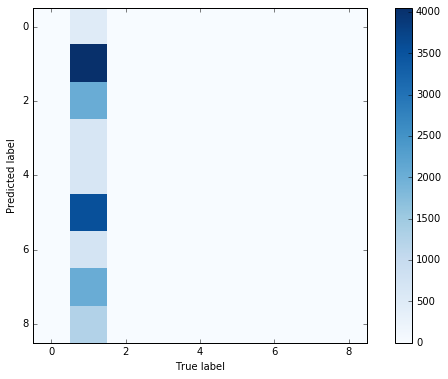

In [3]:
filename = "dummy_classifier"
dummy = DummyClassifier(strategy='most_frequent',random_state=0).fit(X_train, y_train)
y_pred_dummy = dummy.predict(X_test)
print classification_report(y_test, y_pred_dummy)
print dummy.score(X_test, y_test)
plot_matrix(dummy, X_test, y_test, filename)

### Extra Trees Classifier

#### Hacemos un GridSearch para buscar los mejores parámetros para nuestro Extra Trees Classifier

In [ ]:
parameters = {'max_features':np.arange(0.02,0.5,0.1), 'n_estimators':[100,400]}
#clf = ExtraTreesClassifier()
#clf = GridSearchCV(clf, parameters)
#clf.fit(X_train, y_train)
#print clf.best_score_
#print clf.best_params_

#### Creamos un clasificador con los parámetros indicados por el GridSearch 
#### {'max_features': 0.42000000000000004, 'n_estimators': 400}

In [4]:
filename = 'etc_2'
X_scaler = StandardScaler()
X_scaled = X_scaler.fit_transform(X.values.astype(np.float32))

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25)

In [5]:
etc_2 = ExtraTreesClassifier(max_features=0.42, n_estimators=100, n_jobs=2)
etc_2.fit(X_train, y_train)
y_pred_etc_2 = etc_2.predict(X_test)

             precision    recall  f1-score   support

          0       0.45      0.74      0.56       306
          1       0.88      0.72      0.79      4922
          2       0.49      0.64      0.55      1572
          3       0.47      0.83      0.60       370
          4       0.98      0.98      0.98       682
          5       0.95      0.94      0.95      3526
          6       0.63      0.76      0.69       565
          7       0.94      0.87      0.90      2263
          8       0.87      0.86      0.86      1264

avg / total       0.84      0.81      0.82     15470

0.811958629606
Saved: plots/confusion_matrix_etc_2.png


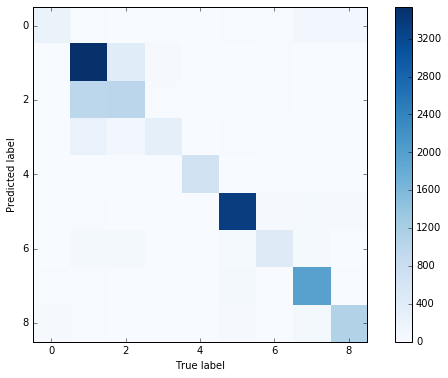

In [6]:
print classification_report(y_pred_etc_2, y_test)
print etc_2.score(X_test, y_test)
plot_matrix(etc_2, X_test, y_test, filename)

#### Features más relevantes

In [7]:
n_components = 57 #explicamos el 95,2287597498% de la variabilidad
pca = PCA(n_components=n_components)
pca.fit(X)
X_pca = pca.transform(X)
X_pca_scaler = MinMaxScaler()
X_pca_scaled = X_pca_scaler.fit_transform(X_pca)

#### Dividimos los datos nuevamente, entrenamos y predecimos

In [8]:
filename = "etc_3"
X_train, X_test, y_train, y_test = train_test_split(X_pca_scaled.astype(np.float32), 
                                                    y, test_size=0.25)

In [9]:
etc_3 = ExtraTreesClassifier(max_features=0.42, n_estimators=100, n_jobs=2)
etc_3.fit(X_train, y_train)
y_pred_etc_3 = etc_3.predict(X_test)

#### Analizamos las salidas gráficas

             precision    recall  f1-score   support

          0       0.39      0.67      0.49       290
          1       0.88      0.69      0.77      5213
          2       0.42      0.58      0.49      1427
          3       0.30      0.85      0.44       226
          4       0.96      0.96      0.96       630
          5       0.94      0.94      0.94      3621
          6       0.63      0.78      0.70       576
          7       0.92      0.87      0.90      2204
          8       0.87      0.83      0.85      1283

avg / total       0.83      0.79      0.80     15470

0.791208791209
Saved: plots/confusion_matrix_etc_3.png


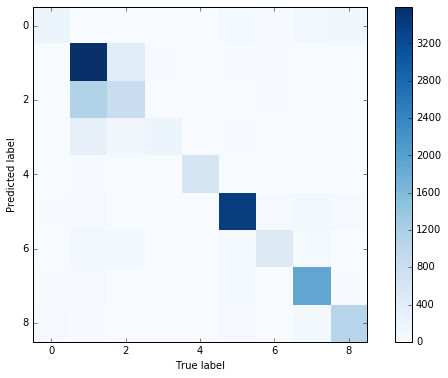

In [10]:
print classification_report(y_pred_etc_3, y_test)
print etc_3.score(X_test, y_test) #100 estimadores = 0.793148028442 - 400 estimadores = 0.79127343245
plot_matrix(etc_3, X_test, y_test, filename)

#### Los siguientes features explican el 95% de la variabilidad de nuestros datos

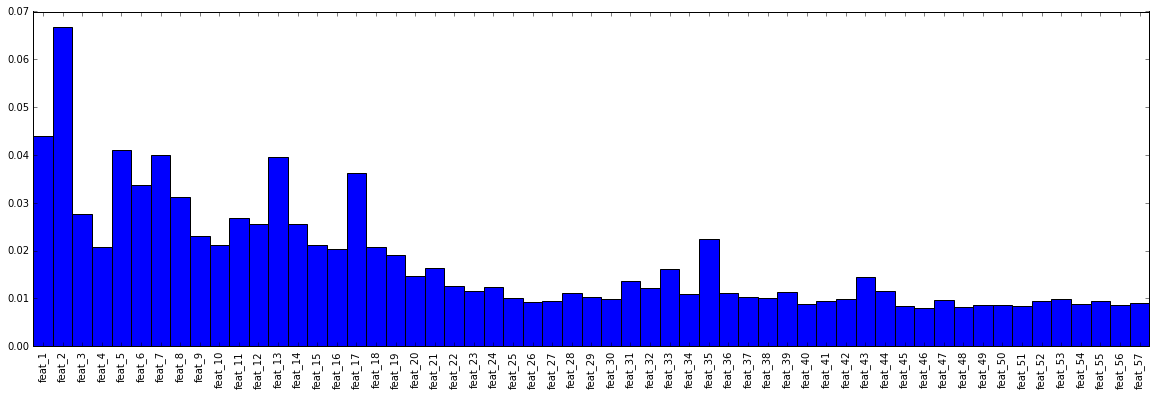

0.0667842683162 feat_2
0.0438694824928 feat_1
0.0409939629352 feat_5
0.0400884077767 feat_7
0.039506078941 feat_13
0.0361561734186 feat_17
0.0336359644697 feat_6
0.0312437208503 feat_8
0.0277003499868 feat_3
0.0269000811522 feat_11
0.0256071109383 feat_12
0.0255255116373 feat_14
0.0230869918808 feat_9
0.022510741052 feat_35
...


In [11]:
importances = etc_3.feature_importances_

df = pd.read_csv('../TP5/data/train.csv')

text = map(lambda i: df.columns[1:-1][i], range(n_components))
plt.figure(figsize=(20, 6))
plt.bar(range(n_components), height=importances,  width=1.)
plt.xticks(np.arange(0.5, n_components, 1.), text, rotation=90)
plt.xlim((0, n_components))
plt.show()

indices = np.argsort(importances)[::-1]
for i in range(n_components/4):
    print importances[indices[i]], df.columns[1:-1][indices[i]]
print "..."

#### Métricas para Extra Trees Classifier

In [12]:
ESTIMATORS = 10
filename = "etc_4"

#X, y, n_classes = get_otto_dataset('../TP5/data/train.csv')

X_scaler = MinMaxScaler()
X_scaled = X_scaler.fit_transform(X.astype(np.float32))

X_train, X_test, y_train, y_test = train_test_split(X_scaled, 
                                                    y, 
                                                    test_size=.25)

etc_4 = ExtraTreesClassifier( max_features=0.42, 
                              n_estimators=ESTIMATORS, 
                              n_jobs=-1)

#### Classification Report y Confusion Matrix

[Classification Report]
             precision    recall  f1-score   support

          0       0.64      0.49      0.56       477
          1       0.71      0.85      0.77      4055
          2       0.58      0.49      0.53      1937
          3       0.77      0.45      0.57       668
          4       0.97      0.96      0.96       716
          5       0.92      0.94      0.93      3484
          6       0.74      0.51      0.60       754
          7       0.88      0.90      0.89      2097
          8       0.86      0.85      0.85      1282

avg / total       0.79      0.79      0.79     15470

[Train dataset] Score: 1.00000
[Test dataset] Score: 0.79263
Saved: plots/confusion_matrix_etc_4.png


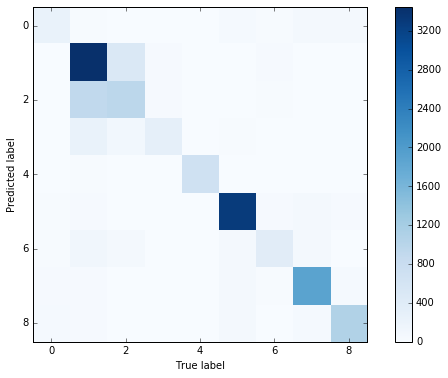

In [13]:
etc_4.fit(X_train, y_train)
y_pred_etc_4 = etc_4.predict(X_test)

print "[Classification Report]"
print classification_report(y_test, y_pred_etc_4)
print "[Train dataset] Score: %.5f" % etc_4.score(X_train, y_train)
print "[Test dataset] Score: %.5f" % etc_4.score(X_test, y_test)
plot_matrix(etc_4, X_test, y_test, filename)

#### ROC Curve

Saved: plots/roc_curve_label_2_etc_4.png


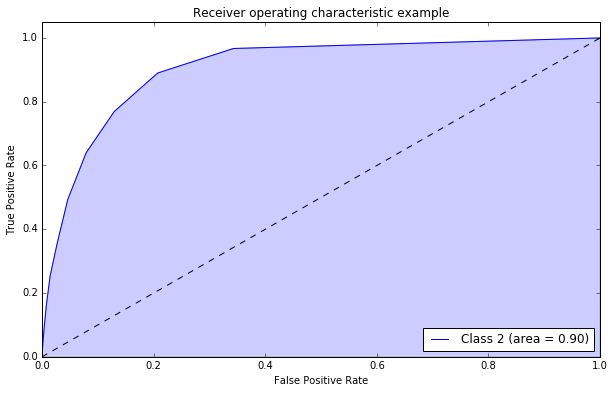

Saved: plots/roc_curves_etc_4.png


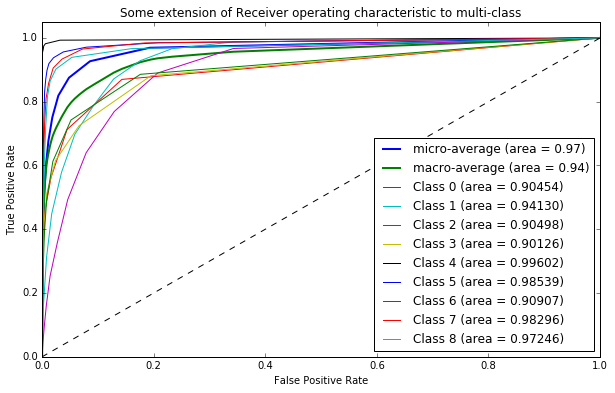

In [14]:
y_score = etc_4.predict_proba(X_test)
y_test_bin = np.array(label_binarize(y_test, classes=np.unique(y)))
n_classes = y_test_bin.shape[1]
plot_roc_curve(n_classes, y_test_bin, y_score, filename)

#### Decision Area

Extra Trees Classifier with 10 estimators and with 2 features has a score of:  0.381524936165
(61878, 2)
Saved: plots/decision_area_etc_4.png


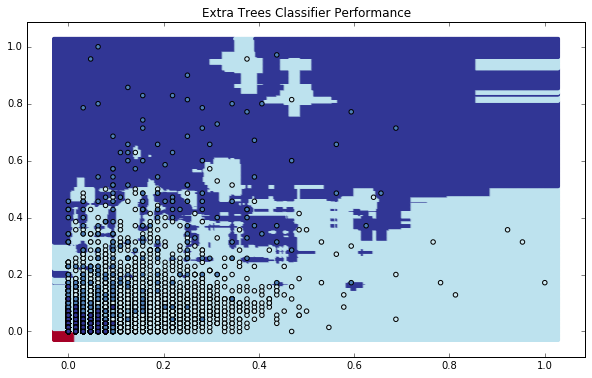

In [15]:
clf = ExtraTreesClassifier(n_estimators=ESTIMATORS, max_features=0.42, n_jobs=-1)
plot_decision_area(clf, X_scaled[:, 2:4], y, title="Extra Trees Classifier", filename=filename)

#### Learning Curve

Saved: plots/learning_curve_etc_4.png


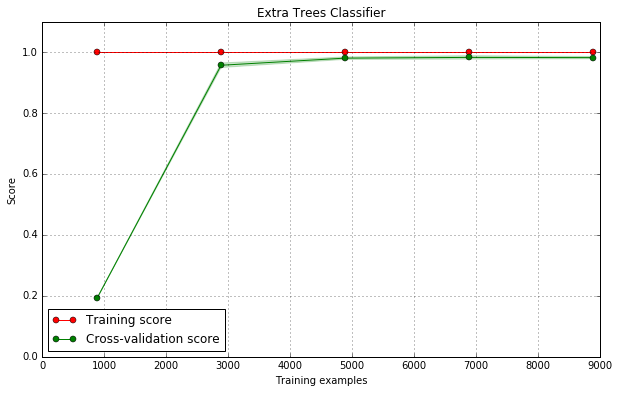

In [16]:
X_lc = X_scaled[:10000]
y_lc = y[:10000]
plot_learning_curve(clf, "Extra Trees Classifier", X_lc, y_lc, cv=9, filename=filename)

#### Validation Curve: max_depth

Best test score: 0.9928
Saved: plots/validation_curve_etc_4.png


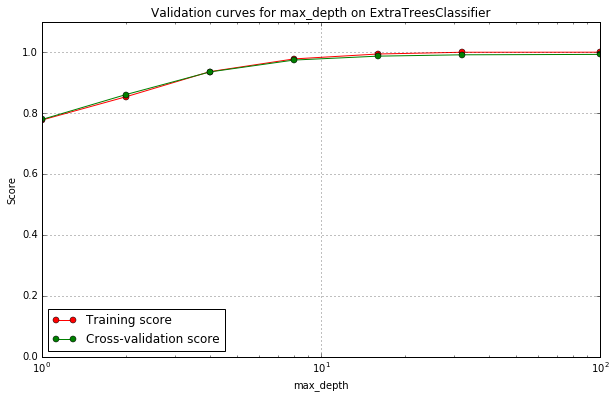

In [17]:
clf = ExtraTreesClassifier(n_estimators=ESTIMATORS ,max_depth=8)
param_name = 'max_depth'
param_range = [1, 2, 4, 8, 16, 32, 100]
plot_validation_curve(clf, X_lc, y_lc,
                  param_name, param_range, 
                  scoring='roc_auc', 
                  cv=n_classes,
                  filename=filename)

### Redes Neuronales

In [19]:
EPOCHS = 10
filename= "neural_networks"

X, y, n_classes = get_otto_dataset('../TP5/data/train.csv')
X = X.astype(np.float32)
y = y.astype(np.int32)

X_scaler = MinMaxScaler()
X_scaled = X_scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=.25)


def NeuralNetConstructor(num_features): 
    layers0 = [('input', InputLayer), 
                ('hidden1', DenseLayer), 
                ('dropout1', DropoutLayer), 
                ('hidden2', DenseLayer), 
                ('dropout2', DropoutLayer), 
                ('output', DenseLayer)]

    net0 = NeuralNet(layers=layers0,
                    input_shape=(None, num_features),
                    hidden1_num_units=500,
                    dropout1_p=0.5,
                    hidden2_num_units=300,
                    dropout2_p=0.3,
                    output_num_units=n_classes,
                    output_nonlinearity=softmax,
                    update=nesterov_momentum,
                    update_learning_rate=0.04,
                    update_momentum=0.9,
                    verbose=1,
                    regression=False,
                    max_epochs=EPOCHS
                    )
    return net0

#### Testing A Simple Prediction

In [20]:
net0 = NeuralNetConstructor(93)
net0.fit(X_train, y_train)
predicted = net0.predict(X_test)

print("Real Label: %s" % str(y_test[0]))
print("Predicted Label: %s" % str(net0.predict(X_test[:1])))

# Neural Network with 200009 learnable parameters

## Layer information

  #  name        size
---  --------  ------
  0  input         93
  1  hidden1      500
  2  dropout1     500
  3  hidden2      300
  4  dropout2     300
  5  output         9

  epoch    train loss    valid loss    train/val    valid acc  dur
-------  ------------  ------------  -----------  -----------  -----
      1       1.34415       1.07278      1.25295      0.63195  1.25s
      2       0.86186       1.02007      0.84491      0.62785  1.22s
      3       0.78740       0.99034      0.79508      0.62689  1.22s
      4       0.75562       0.88699      0.85189      0.66536  1.22s
      5       0.73892       0.91847      0.80451      0.66048  1.21s
      6       0.72747       0.83329      0.87301      0.67566  1.22s
      7       0.71744       0.76082      0.94298      0.71694  1.22s
      8       0.71147       0.82706      0.86025      0.70168  1.21s
      9       0.71002       0.89246      0.79558      0.67785 

#### Estructura de la red

In [21]:
layer_info = PrintLayerInfo()
net0.verbose = 3
net0.initialize()
layer_info(net0)

# Neural Network with 200009 learnable parameters

## Layer information

  #  name        size
---  --------  ------
  0  input         93
  1  hidden1      500
  2  dropout1     500
  3  hidden2      300
  4  dropout2     300
  5  output         9



#### Métricas

#### Classfication report & Confusion Matrix

[Classification Report]: 
             precision    recall  f1-score   support

          0       0.46      0.40      0.43       483
          1       0.72      0.65      0.68      4022
          2       0.53      0.23      0.32      1947
          3       0.25      0.62      0.36       672
          4       0.95      0.89      0.92       661
          5       0.82      0.95      0.88      3575
          6       0.47      0.64      0.54       726
          7       0.93      0.79      0.86      2193
          8       0.78      0.85      0.81      1191

avg / total       0.72      0.70      0.70     15470

[Train dataset] Score:  0.704404413032
[Test dataset] Score:  0.702133160957
Saved: plots/confusion_matrix_neural_networks.png


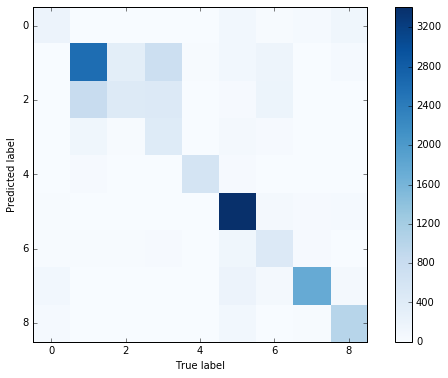

In [22]:
print "[Classification Report]: "
print classification_report(y_test, predicted)
print "[Train dataset] Score: ", net0.score(X_train, y_train)
print "[Test dataset] Score: ", net0.score(X_test, y_test)
plot_matrix(net0, X_test, y_test, filename)

#### Accuracy

Saved: plots/accuracy_neural_networks.png


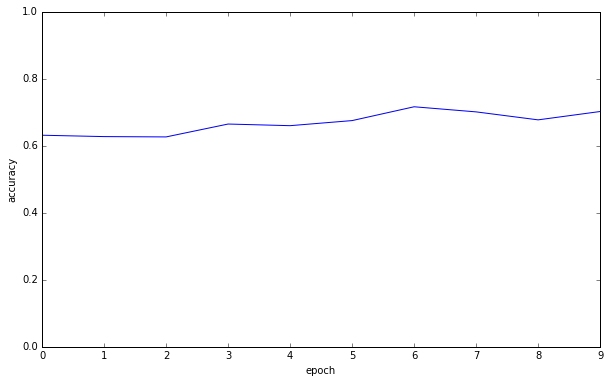

In [23]:
valid_accuracies = np.array([i["valid_accuracy"] for i in net0.train_history_])
plot_accuracy(valid_accuracies, filename)

#### Loss

Saved: plots/loss_neural_networks.png


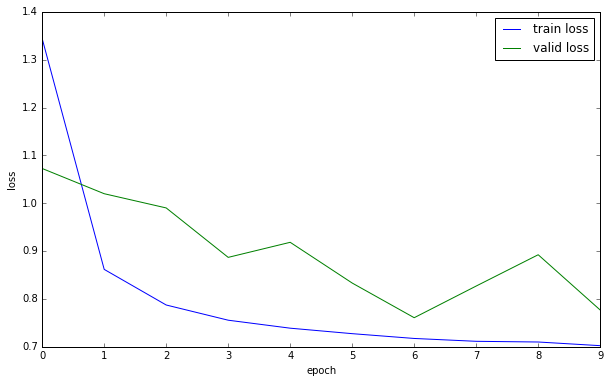

In [24]:
train_loss = [row['train_loss'] for row in net0.train_history_]
valid_loss = [row['valid_loss'] for row in net0.train_history_]
plot_loss(valid_loss, train_loss, filename)

#### ROC Curve

Saved: plots/roc_curve_label_2_neural_networks.png


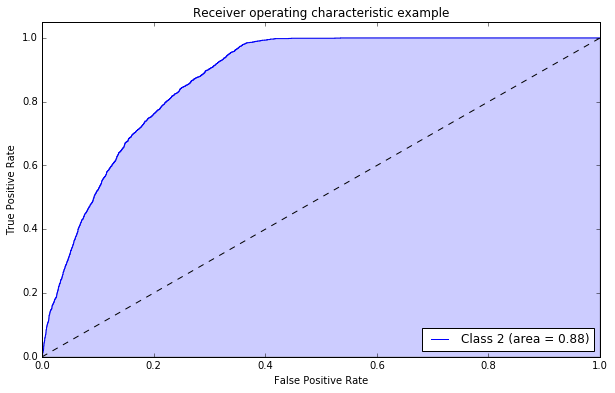

Saved: plots/roc_curves_neural_networks.png


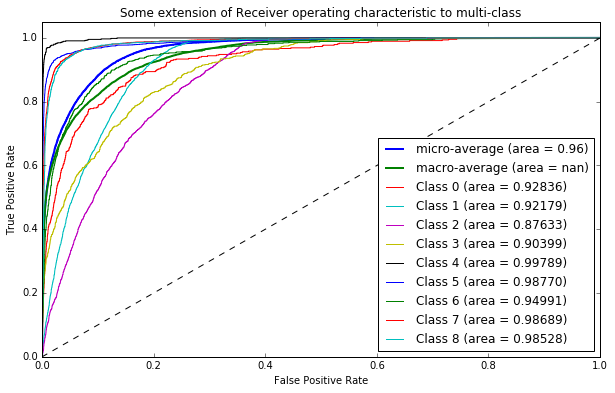

In [25]:
y_score = net0.predict_proba(X_test) #[:, 1]
y_test_bin = np.array(label_binarize(y_test, classes=np.unique(y)))
n_classes = y_test_bin.shape[1]
plot_roc_curve(n_classes, y_test_bin, y_score, filename=filename)